In [1]:
import altair as alt
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')

alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
df_terms = pd.read_csv('../data/hathi_ef/identified_keywords_anticol_data.csv')


In [5]:
df = df_terms

In [6]:
grouped_df = df.groupby(['date', 'binned','term'])['word_counts'].sum().reset_index()
grouped_pages = df.groupby(['date','binned','term'])['page_number'].count().reset_index()
grouped_tokens = df.groupby(['date'])['tokenized_counts'].sum().reset_index()
co = pd.merge(grouped_df, grouped_pages, on=['date', 'binned','term'])
final_group = pd.merge(co, grouped_tokens, on=['date'], how='left')
final_group['year'] = final_group['date'].str.split('-').str[0]

In [7]:
grouped_df = df.groupby(['date', 'binned','term', 'page_number'])['word_counts'].sum().reset_index()
grouped_df
# grouped_pages = df.groupby(['date','binned','term'])['page_number'].count().reset_index()
grouped_tokens = df.groupby(['date'])['tokenized_counts'].sum().reset_index()
# co = pd.merge(grouped_df, grouped_pages, on=['date', 'binned','term'])
final_group = pd.merge(grouped_df, grouped_tokens, on=['date'], how='left')
final_group['year'] = final_group['date'].str.split('-').str[0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118115fd0>]],
      dtype=object)

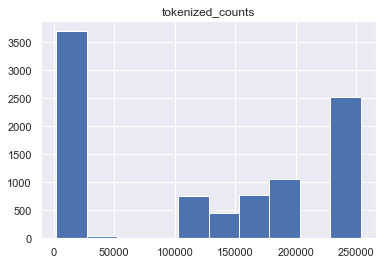

In [8]:
t5 = final_group[['tokenized_counts']]
t5.hist()

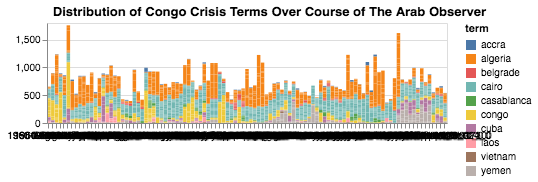

In [19]:
final_group['date_bin'] = final_group.date.astype(str) + '_' + final_group.binned.astype(str)
final_group['avg'] = final_group.word_counts / final_group.tokenized_counts * 100000
final_group1 = final_group.loc[final_group.year < '1963']
final_group2 = final_group.loc[final_group.year > '1962']
# alt.Chart(final_group).mark_bar().encode(
#     x=alt.X('date_bin:N', axis=alt.Axis(title='', labelAngle=0)),
#     y=alt.Y('avg:Q', axis=alt.Axis(title='')),
#     color='term:N',
#     row='term:N'
# ).properties(
#     width=400,
#     height=100,
#     title='Distribution of Congo Crisis Terms Over Course of The Arab Observer'
# )
bar1 = alt.Chart(final_group1).mark_bar().encode(
    x=alt.X('date_bin:N', axis=alt.Axis(title='', labelAngle=0)),
    y=alt.Y('avg:Q', axis=alt.Axis(title='')),
    color='term:N'
).properties(
    width=400,
    height=100,
    title='Distribution of Congo Crisis Terms Over Course of The Arab Observer'
)

bar2 = alt.Chart(final_group2).mark_bar().encode(
    x=alt.X('date_bin:N', axis=alt.Axis(title='', labelAngle=0)),
    y=alt.Y('avg:Q', axis=alt.Axis(title='')),
    color='term:N'
).properties(
    width=400,
    height=100,
    title='Distribution of Congo Crisis Terms Over Course of The Arab Observer'
)
bar1 

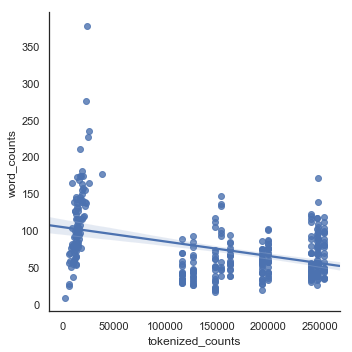

In [10]:
# g = sns.lmplot(y="word_counts", x="tokenized_counts", col="term", data=final, col_wrap=3, height=3);
test = final_group.groupby(['date_bin'])['word_counts'].sum().reset_index()
tokens = final_group[['date', 'date_bin', 'tokenized_counts']]
tokens.drop_duplicates(inplace=True)
# t = tokens.groupby(['date'])['tokenized_counts'].sum().reset_index()

tokens

final = pd.merge(test, tokens, on=['date_bin'], how='left')
sns.set_style("white")
g = sns.lmplot(x="tokenized_counts", y="word_counts", data=final);

In [11]:
import statsmodels.api as sm

X = final["word_counts"]
y = final['tokenized_counts']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       tokenized_counts   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     205.9
Date:                Thu, 03 Jan 2019   Prob (F-statistic):           7.77e-37
Time:                        11:19:03   Log-Likelihood:                -4510.1
No. Observations:                 341   AIC:                             9022.
Df Residuals:                     340   BIC:                             9026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
word_counts  1183.3813     82.474     14.348      0.000    1021.157    1345.605
==============================================================================
Omnibus:                       29.704   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.181
Skew:                          -0.752   Prob(JB):                     3.78e-08
Kurtosis:                       2.623   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

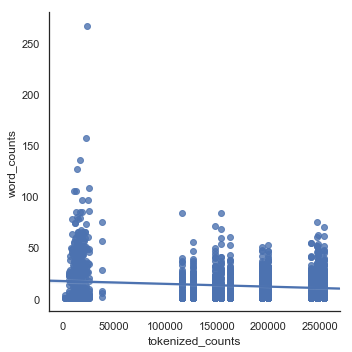

In [12]:

group_terms = final_group.groupby(['date_bin', 'term'])['word_counts'].sum().reset_index()
token_terms = final_group[['date', 'date_bin', 'tokenized_counts']]
token_terms.drop_duplicates(inplace=True)
# token_year = token_terms.groupby(['year'])['tokenized_counts'].sum().reset_index()

final = pd.merge(group_terms, token_terms, on=['date_bin'], how='left')
final['avg'] = final.word_counts / final.tokenized_counts * 100000
final.avg = final.avg.round()
final
# sns.set_style("white")
g = sns.lmplot(x="tokenized_counts", y="word_counts", data=final);

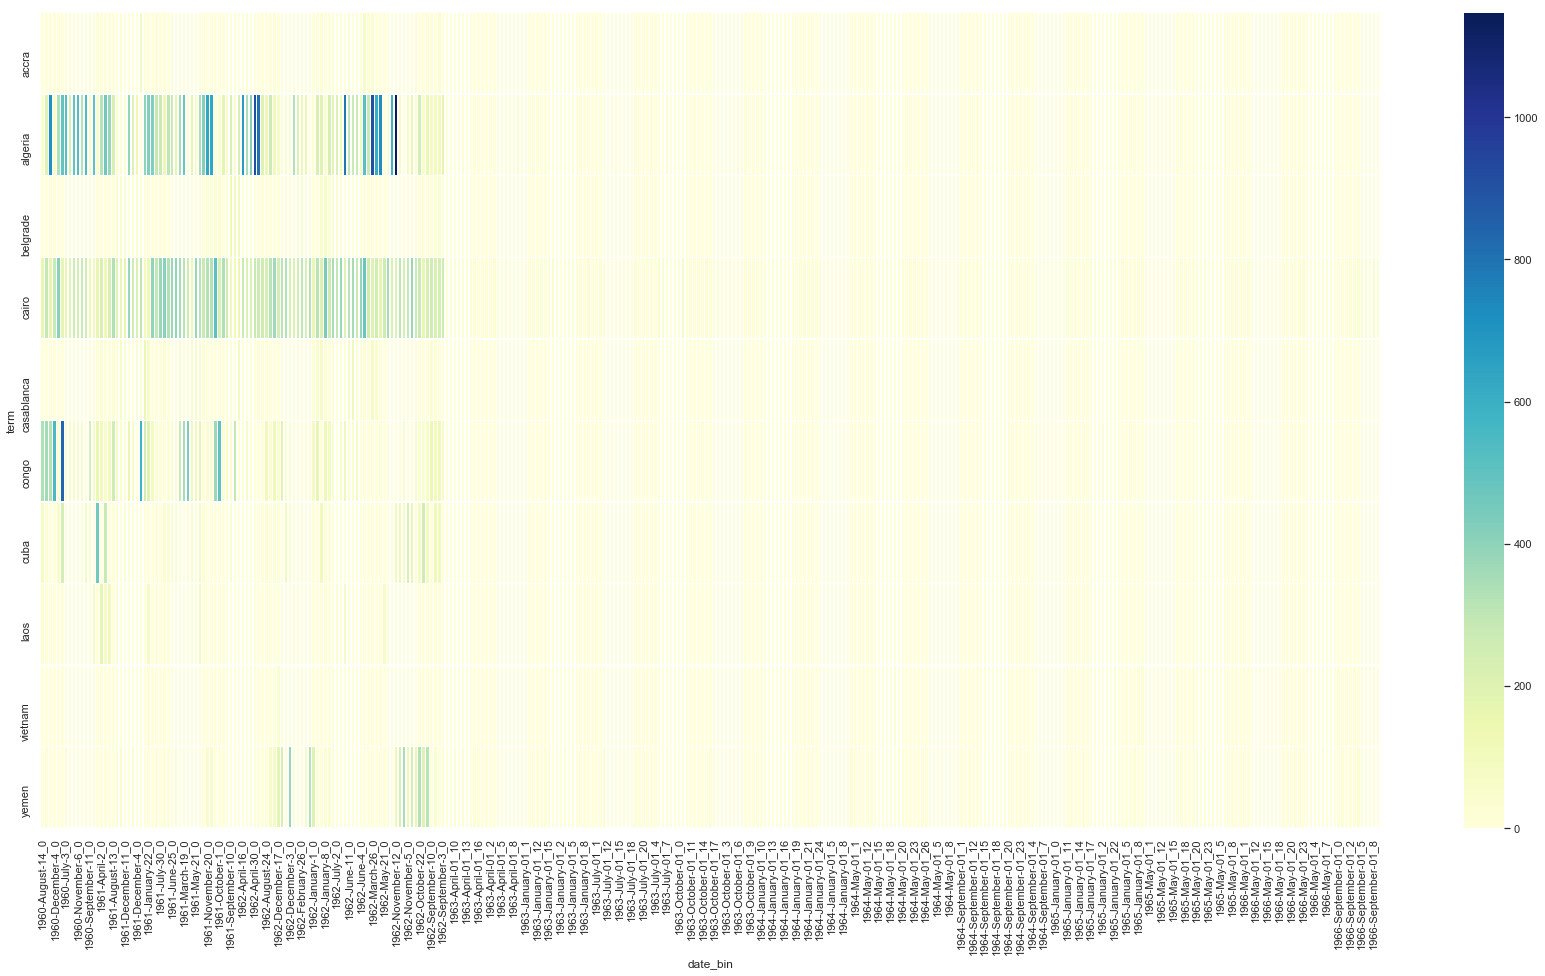

In [13]:
pi = pd.pivot_table(final, values='avg', index=['term'], columns=['date_bin'], fill_value=0, aggfunc=np.sum)
pi
# # plt.pcolor(pi)
# # plt.yticks(np.arange(0.5, len(pi.index), 1), pi.index)
# # plt.xticks(np.arange(0.5, len(pi.columns), 1), pi.columns)
plt.figure(figsize=(30, 15))
ax = plt.axes()
g = sns.heatmap(pi, ax=ax, cmap="YlGnBu", linewidths=.5)
# ax.set_title('Frequency of keyword co-occurence with each other across the corpus', fontsize=16)

# ax.set_ylabel('')
# ax.set_xlabel('')
# ax.tick_params(labelsize=14)

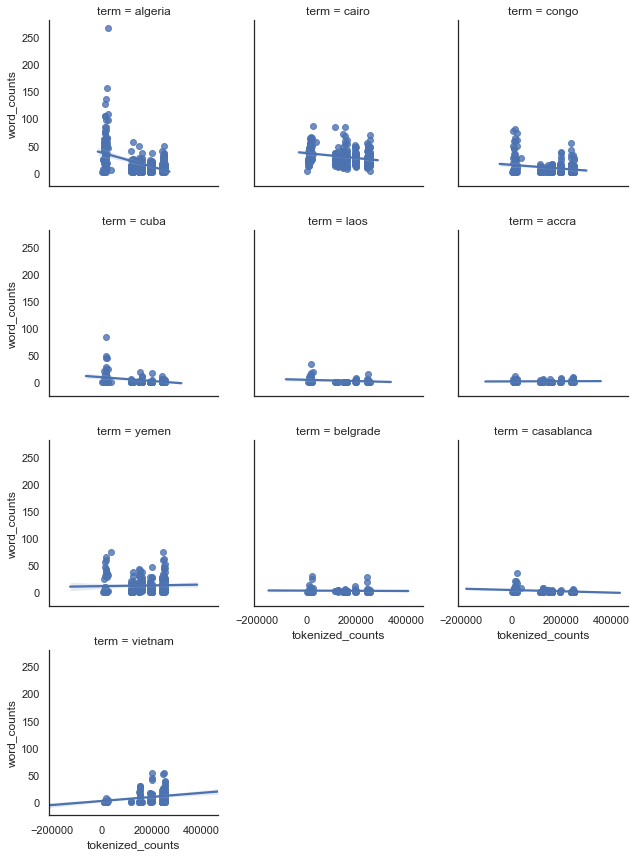

In [14]:
g = sns.lmplot(y="word_counts", x="tokenized_counts", col="term", data=final, col_wrap=3, height=3);

In [64]:
years = final.date_bin.unique().tolist()
import statsmodels.api as sm
# print(years)
terms = final.term.unique().tolist()

for t in terms:
    r = final.loc[final.term == t]
    X = r.tokenized_counts
    y = r.word_counts

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    print(t, model.rsquared_adj)

algeria 0.07559525156752966
cairo 0.4675480372562748
congo 0.1316644957270009
cuba 0.03491789927823363
laos 0.09784793627532895
accra 0.3439696284134074
yemen 0.34813614238232427
belgrade 0.16783880606101587
casablanca 0.07974863996776249
vietnam 0.42867860399201885


In [15]:
df_combos = pd.read_csv('../data/hathi_ef/raw_combination_keywords_congo_data.csv')

In [16]:
df_combos = df_combos.loc[df_combos['target'] != df_combos['source']]
df_combos['year'] = df_combos['date'].str.split('-').str[0]
df_combos['terms'] = df_combos['target'] + '_' + df_combos['source']
df_grouped_co = df_combos.groupby(['year','terms']).size().reset_index()
df_grouped_co.year = df_grouped_co.year.astype(int)

df_grouped_co.rename(columns={0: 'count'}, inplace=True)

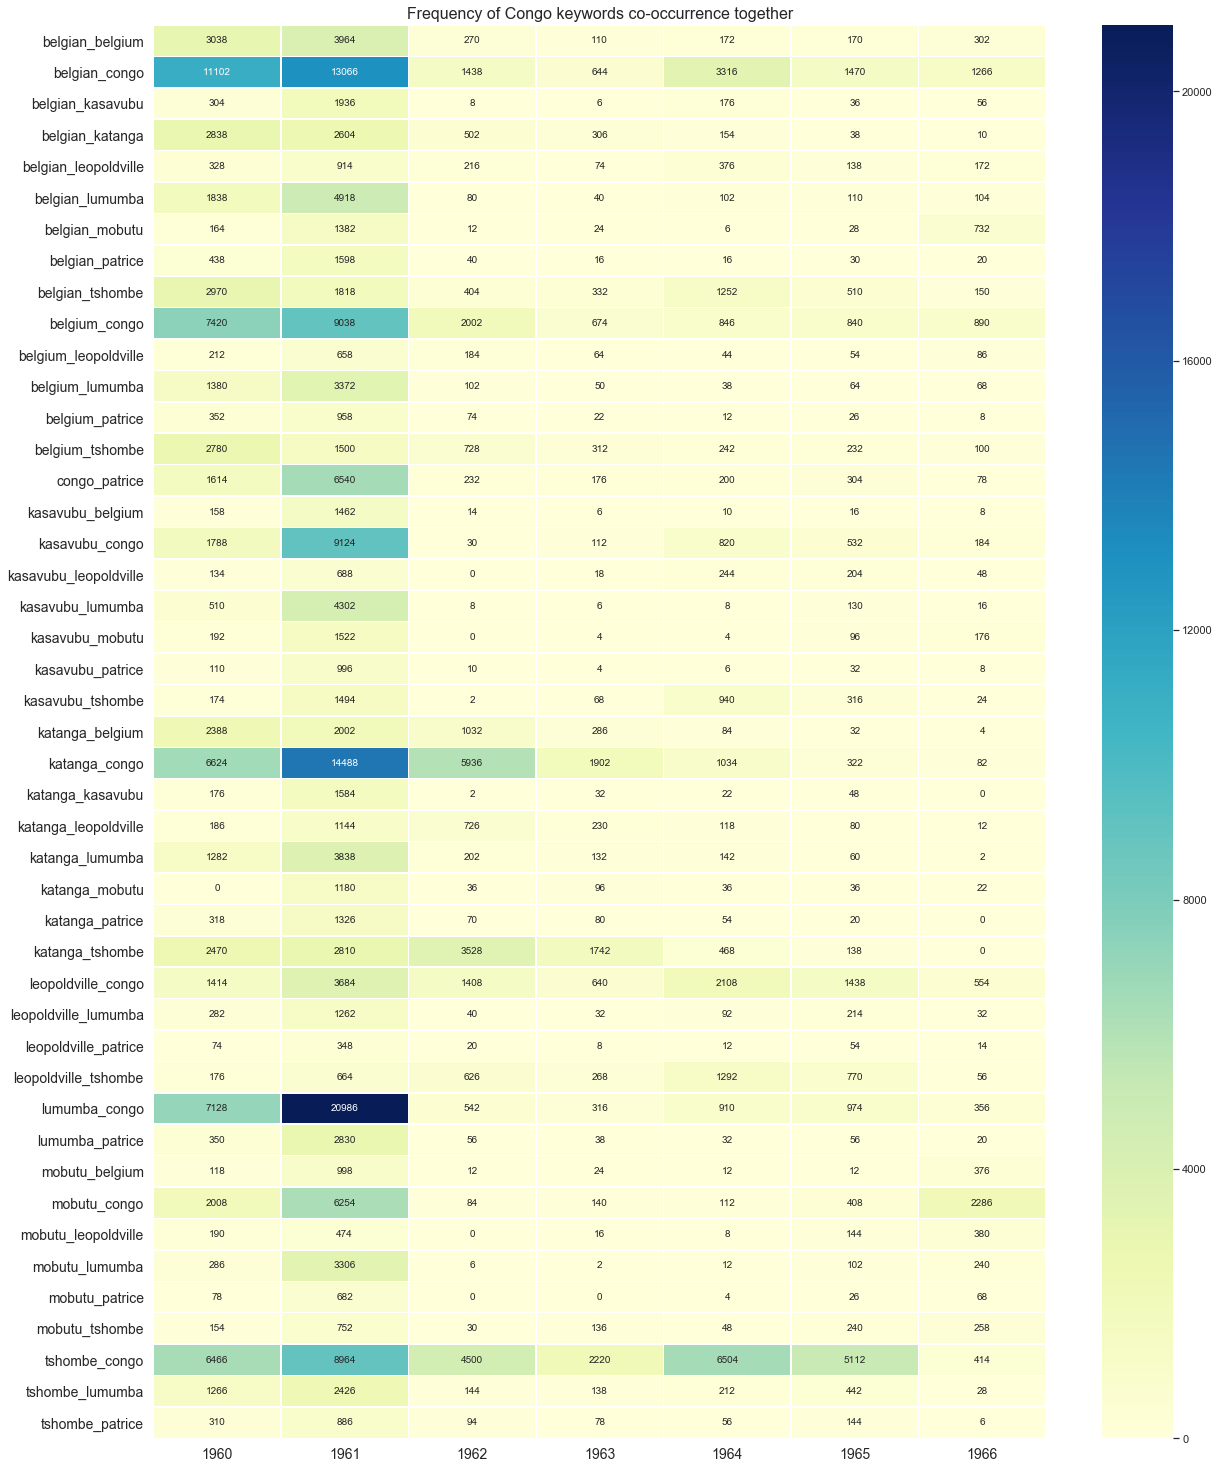

In [20]:
pi = pd.pivot_table(df_grouped_co, values='count', index=['terms'], columns=['year'], fill_value=0, aggfunc=np.sum)

# # plt.pcolor(pi)
# # plt.yticks(np.arange(0.5, len(pi.index), 1), pi.index)
# # plt.xticks(np.arange(0.5, len(pi.columns), 1), pi.columns)
plt.figure(figsize=(20, 26))
ax = plt.axes()
g = sns.heatmap(pi, ax=ax, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
ax.set_title('Frequency of Congo keywords co-occurrence together', fontsize=16)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(labelsize=14)
plt.savefig('congo_coocurence.png')

In [19]:
tc = final_group[['date', 'binned', 'tokenized_counts', 'year']]
tc.drop_duplicates(keep='first', inplace=True)

In [30]:
tok = tc.groupby(['year'])['tokenized_counts'].sum().reset_index()
tok.year = tok.year.astype(int)


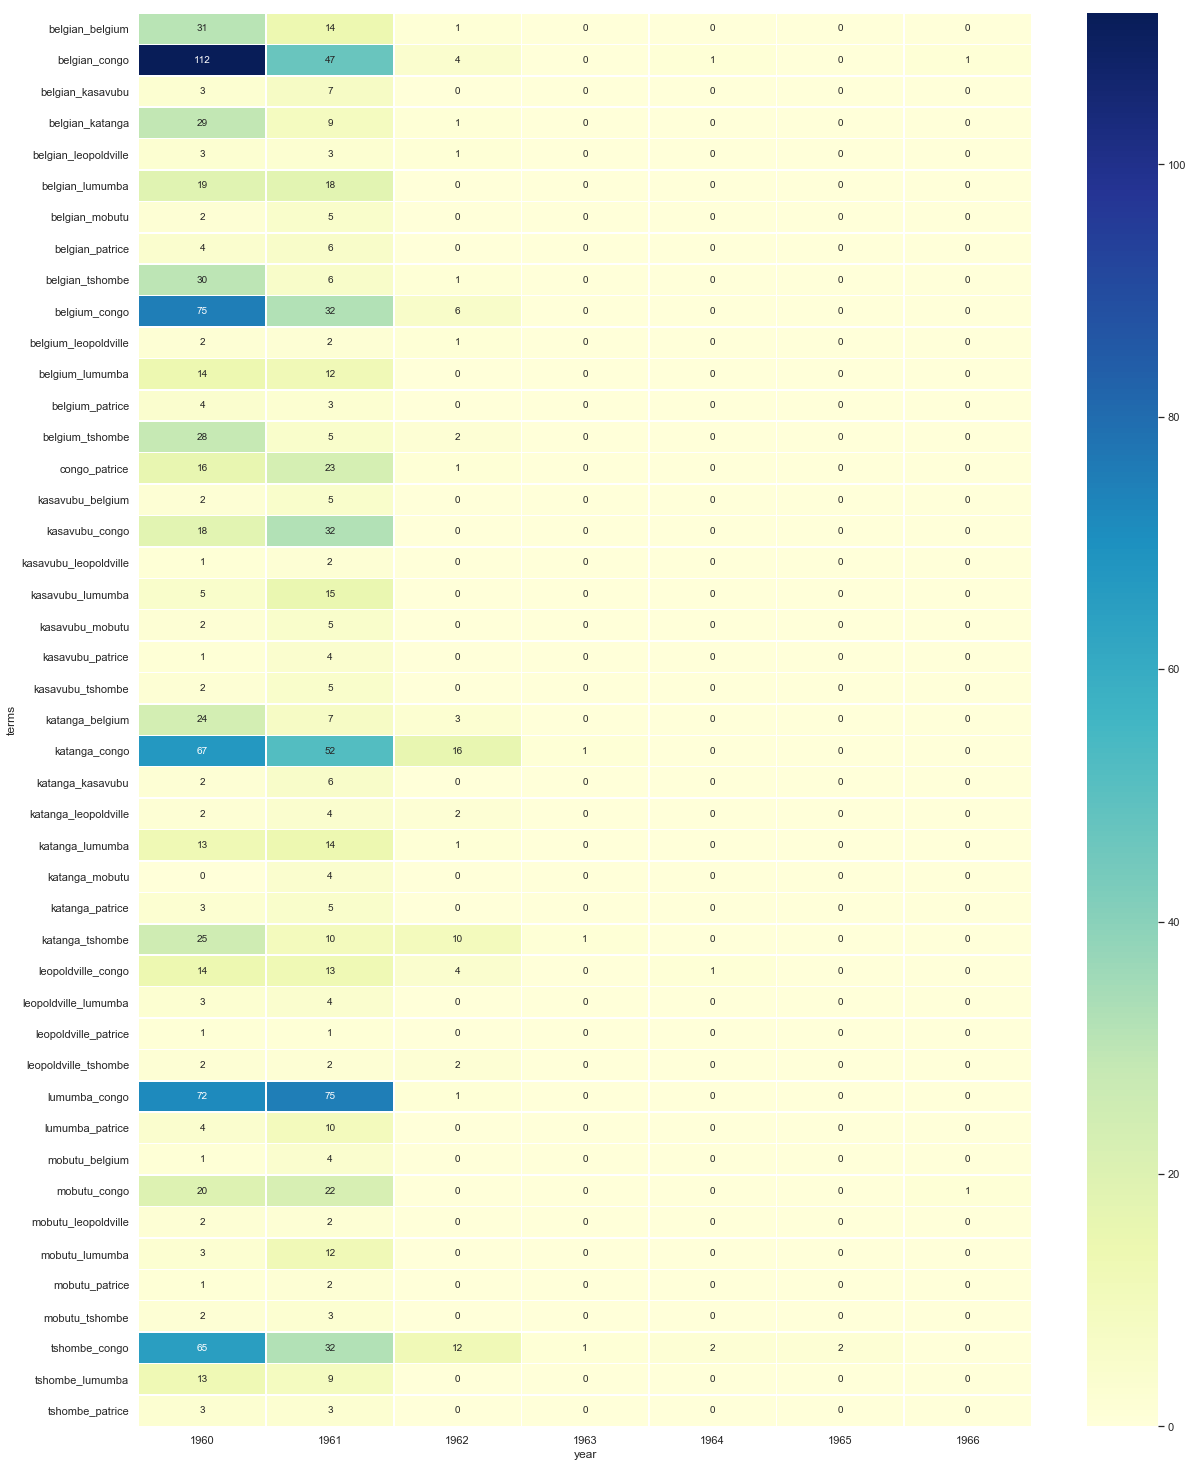

In [53]:
combos_year = pd.merge(df_grouped_co, tok, on=['year'], how='left')
combos_year['avg'] = combos_year['count'].astype(int) / combos_year.tokenized_counts.astype(int) * 10000
combos_year.avg = combos_year.avg.round()
pi = pd.pivot_table(combos_year, values='avg', index=['terms'], columns=['year'], fill_value=0, aggfunc=np.sum)
pi
# # plt.pcolor(pi)
# # plt.yticks(np.arange(0.5, len(pi.index), 1), pi.index)
# # plt.xticks(np.arange(0.5, len(pi.columns), 1), pi.columns)
plt.figure(figsize=(20, 26))
ax = plt.axes()
g = sns.heatmap(pi, ax=ax, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5)
# ax.set_title('Frequency of keyword co-occurence with each other across the corpus', fontsize=16)

# ax.set_ylabel('')
# ax.set_xlabel('')
# ax.tick_params(labelsize=14)

In [103]:
keys = pd.read_csv('../data/hathi_ef/cleaned_binned_initial_data_pages.csv')

In [35]:
from yellowbrick.text import DispersionPlot

In [163]:
terms_1960 = ['kasavubu','casablanca','hammarskjoeld', 'lumumba', 'katanga', 'patrice']

terms_1966 = ['angola', 'brazzaville', 'vietnam', 'tanganyika', 'congolese', 'mobutu']
terms = ['patrice','congo','lumumba','tshombe','leopoldville','belgium','mobutu','kasavubu','katanga', 'belgian']

terms = terms + terms_1960 + terms_1966

In [37]:

import itertools
import ast
tokens = keys.token_lists.values
tl = []
for t in tokens:
    combined = list(itertools.chain.from_iterable(ast.literal_eval(t)))
    tl.append(combined)

In [38]:
combo = list(itertools.chain.from_iterable(tl))
len(combo), len(tl)

(3985266, 12894)

In [164]:

visualizer = DispersionPlot(terms)
visualizer.fit(combo)
visualizer.poof()

In [160]:
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

keys = df_terms.loc[df_terms.term == 'lumumba']
vectorizer = CountVectorizer(max_df=0.05)
docs = vectorizer.fit_transform(keys.token_texts.tolist())
features = vectorizer.get_feature_names()


<IPython.core.display.Javascript object>


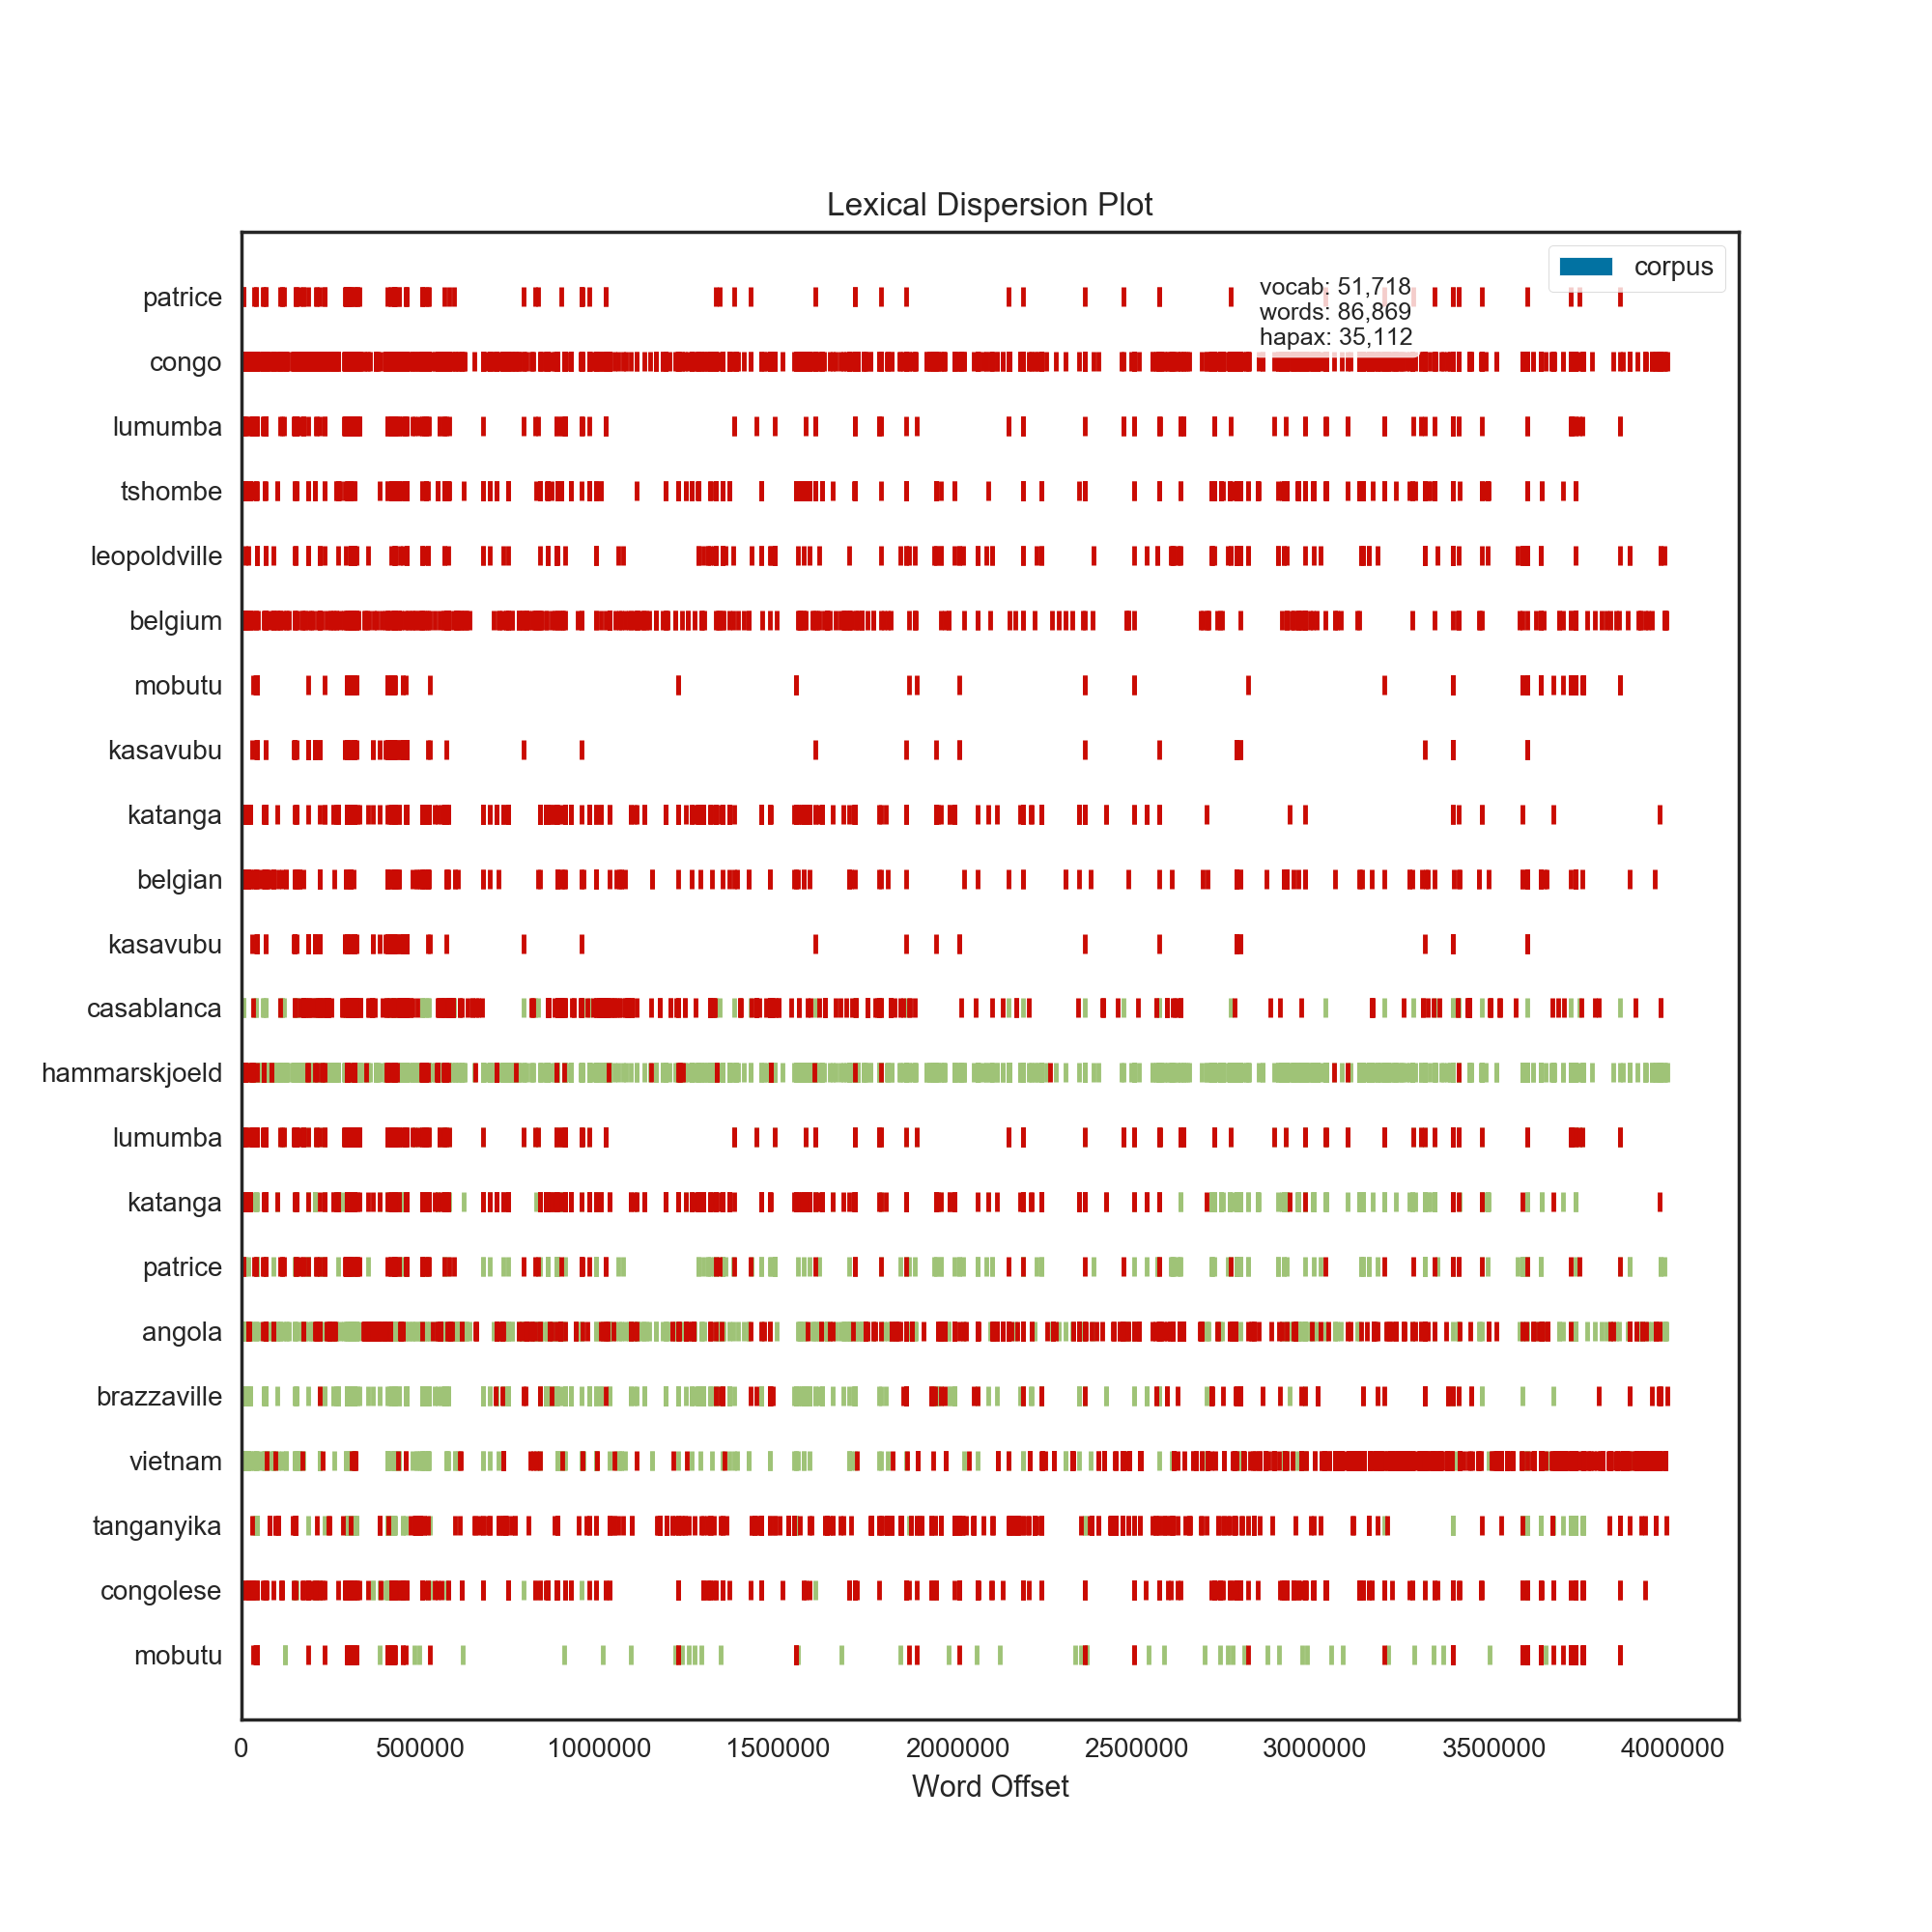

In [161]:
%matplotlib notebook
plt.figure(figsize=(10, 10))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()